# Project 1 - Simulating Endangered Populations

Copyright 2018. Duncan Mazza and Aditya Sudhakar 

*No model is correct, but some are useful

In [26]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
from pandas import read_html 

## Can we predict whether an endangered species will pass a certain population threshold in a given amount of time? 

We live in a time of decreasing bio-diversity and increasing numbers of endangered species. When taking conservational measures with a species, it is important to make predictions about the future of the species. Existing metrics for this exist - notably, the MVP, or minimum viable population. The minimum viable population (specifically the MVPa metric) refers to, "...the minimum viable adult population size as estimated from the available data regardless of study length," according to the article: "Estimates of minimum viable population sizes for vertebrates and factors influencing those estimates" (cited at the end of the essay). 

What our model aims to do is predict for a given population of a species with a known population growth rate and MVPa value whether they will reach their MVPa threshold within 20 years. Essentially, can we expect that the population will reach a minimum threshold for survivability within the next 20 years? 

Our model will produce a graph that plots aforementioned probability versus the given population. To determine the parameters used for our model, we will examine the whooping crane (*grus americana*). The parameters are:
1. Population growth rate:
    This is determined from the population graph of the whooping crane obtained from the Center for Biological Diversity. We used the population of 150 from 1995 and the population of 450 from 2015 to obtain a grwoth of 300 cranes over the last 20 years. Fit to an exponential model (which the population graph follows), the year-over-year growth rate was approximately 5.65%:


2. MVPa value:
    The following article lists the MVPa value for the whooping crane to be 1131 cranes: "Estimates of minimum viable population sizes for vertebrates and factors influencing those estimates." This will be used as the threshold for success in our model. The final output will be a probability, and that proability is determined by the number times that the simulation produced a population that surpassed the MPVa value for the whooping crane. 
    
We will store these parameters as follows:

In [29]:
system = System(t_0 = 0,
                t_final = 20,
                growth_rate = 0.0565
                )

state = State(pop = 0, succ = 0, p_succ = 0, pop_20 = 0, mvpa =  1131)

,values
pop,0
succ,0
p_succ,0
pop_20,0
mvpa,1131


Here we establish `run_simulation1` which simulates population increase for the first year, and `run_simulation_2_20` which simulates the population increase for the next twenty years. These are separate functions so the first one can set the population value (which is being swept) back to the starting value and the fucntion doesn't compound itself when being run.

In [30]:
def run_simulation1(state, system, init_pop):
   #this function is for computing the population after the first year            
    
    state.pop = int(init_pop)
    
    for i in range (state.pop):
       
        if flip(system.growth_rate):
            state.pop += 1
    
    return state.pop

def run_simulation2_20(state, system):
    #this function is for computing the population for years 2 - 20
    
    for i in range (state.pop):
       
        if flip(system.growth_rate):
            state.pop += 1
    
    return state.pop

In [31]:
def run_simulation20(state, system, init_pop):
    
    #this function is for computing the final population at the end of the twenty years
    #run_simulation20 runs the two prior functions such that an ending population is calculated from an initial population
    
    for i in linrange(1,20,1):
        
        if i == 1:
            state.pop_20 = run_simulation1(state, system, init_pop) 
        if i >= 2:
            state.pop_20 = run_simulation2_20(state, system)
    
    return state.pop_20

In [33]:
record = TimeSeries()
def run_many_times(state, system, record):
    
    #runs the simulation 100 times (many) to generate a time series of data. 
    #The output is a probabilty for the chance a population with cross the MVPa threshold after 20 years.
    
    state.succ = 0
    
    for i in range(100):
        record[i] = run_simulation20(state, system, init_pop)
    
        if record[i] >= state.mvpa:
            state.succ += 1
    

    state.p_succ = state.succ
    return state


   Finally, we will call the `run_many_times` in a for loop that sweeps the initial population.

In [35]:
init_pop_array = linrange(300, 500, 1)

final_results = SweepSeries()

for init_pop in init_pop_array:
    #sweeps different starting populations and runs the simulation many times
    
    state = run_many_times(state, system, record)
    final_results[init_pop] = float(state.p_succ)

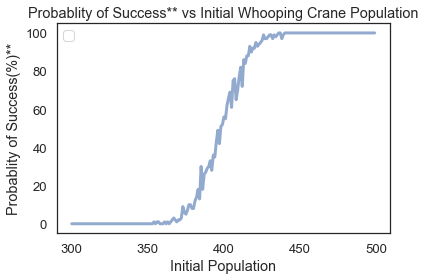

In [47]:
plot(final_results)
#plots results
decorate(xlabel='Initial Population', 
         ylabel='Probablity of Success(%)**',
         title='Probablity of Success** vs Initial Whooping Crane Population')

**Probability of surpassing MVPa in the next twenty years

Above is the final result that shows the relationship between the probability that, given the year-over-year growth rate is held constant, the population of whooping cranes will reach the MVPa threshold population of 1131.

As we predicted, the probability formed a logistic-shaped curve. We can conclude that if the population of whooping cranes was below 350, there would be a near-0% chance that it would surpass the MVPa threshold in the next twenty years; conversely, if given population of whooping cranes was above 450, then it would be expected that the population would exceed the MVPa threshold in the next twenty years. 

Our model does not exclusively apply to Whooping Crane populations. If one knows the MVPa threshold for a specific organism and can assume that the yearly growth rate is constant, our model can be used. Note that we can (and did) assume constant yearly growth rate because no recent/notable conservation efforts were made to protect the population. 

To account for non-constant growth rate, we could investigate accounting for non-constant growth rate as a function of time.

https://www.esasuccess.org/2016/index.html

Estimates of minimum viable population sizes for vertebrates and factors influencing those estimates: http://www.wec.ufl.edu/academics/courses/wis4554/WebUpdate/ReadingsWIS5555/PVA/Reed%20et%20al%20PVA%20estimates%202003BiolCons113_23.pdf

*Godspeed*